In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

ModuleNotFoundError: No module named 'tensorflow.keras'

In [ ]:
# Cargar conjuntos de características
X_train = pd.read_csv("Data/processed/X_train.csv")
X_test = pd.read_csv("Data/processed/X_test.csv")

# Cargar conjuntos de la variable objetivo
y_train = pd.read_csv("Data/processed/y_train.csv")
y_test = pd.read_csv("Data/processed/y_test.csv")

In [ ]:
print("Conjunto de entrenamiento (X_train) dimensiones:", X_train.shape)
print("Conjunto de prueba (X_test) dimensiones:", X_test.shape)
print("Variable objetivo entrenamiento (y_train) dimensiones:", y_train.shape)
print("Variable objetivo prueba (y_test) dimensiones:", y_test.shape)

Conjunto de entrenamiento (X_train) dimensiones: (758, 16)
Conjunto de prueba (X_test) dimensiones: (190, 16)
Variable objetivo entrenamiento (y_train) dimensiones: (758, 1)
Variable objetivo prueba (y_test) dimensiones: (190, 1)


In [ ]:
X_train.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,-1.698893,0.648468,1.624861,-1.639258,-0.332459,1.335052,1.352098,-2.090210,1.455967,0.743295,3,-0.209108,True,True,False,False
1,0.272414,-0.677216,0.136465,1.312192,-0.192966,-1.395960,1.527098,-1.370923,0.122330,1.839092,3,-0.790411,False,False,False,True
2,-1.123928,2.205322,0.841495,-0.076726,-1.657634,-1.532510,-0.631235,-0.427859,-0.211079,-0.352502,2,1.666984,True,False,False,False
3,0.354552,-0.247902,-1.586940,-0.597570,-0.471951,0.788850,0.477098,0.499221,-0.044375,0.743295,2,0.717672,False,False,False,True
4,-1.123928,1.469355,1.233178,-0.510763,0.853224,0.652299,0.243765,-0.571716,-0.544488,-0.352502,2,0.720677,True,False,False,False


In [ ]:
y_train.head()

,Calories_Burned
0,1315.0
1,1129.0
2,686.0
3,875.0
4,1150.0


In [ ]:
# Convertir columnas booleanas a enteros
bool_columns = ['Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga']
X_train[bool_columns] = X_train[bool_columns].astype(int)
X_test[bool_columns] = X_test[bool_columns].astype(int)

In [ ]:
# Convertir DataFrames a arrays NumPy
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
from tensorflow.keras.regularizers import l2 #Accuracy

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.000)))
model.add(Dropout(0.00))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.000)))
model.add(Dropout(0.00))
model.add(Dense(32, activation='relu', kernel_regularizer = l2(0.000)))
#model.add(Dropout(0.00))
#model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.000)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['mean_absolute_error'])

In [ ]:
# Definir el callback de Early Stopping para evitar el sobreentrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train, 
                    epochs=120, 
                    batch_size=16, 
                    validation_split=0.1, 
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/120
43/43 [==============================] - 2s 14ms/step - loss: 900050.3125 - mean_absolute_error: 908.5358 - val_loss: 719996.8750 - val_mean_absolute_error: 813.8971
Epoch 2/120
43/43 [==============================] - 0s 5ms/step - loss: 715753.6875 - mean_absolute_error: 804.1632 - val_loss: 363108.0625 - val_mean_absolute_error: 569.4035
Epoch 3/120
43/43 [==============================] - 0s 6ms/step - loss: 148278.7500 - mean_absolute_error: 309.2579 - val_loss: 29710.3281 - val_mean_absolute_error: 142.4583
Epoch 4/120
43/43 [==============================] - 0s 7ms/step - loss: 24526.5039 - mean_absolute_error: 124.7565 - val_loss: 17935.9844 - val_mean_absolute_error: 105.8324
Epoch 5/120
43/43 [==============================] - 0s 7ms/step - loss: 17184.9648 - mean_absolute_error: 103.1020 - val_loss: 13721.8555 - val_mean_absolute_error: 91.0382
Epoch 6/120
43/43 [==============================] - 0s 6ms/step - loss: 13505.9443 - mean_absolute_error: 90.6875 - val

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Pérdida (MSE) en el conjunto de prueba: {loss:.4f}')
print(f'Error Absoluto Medio (MAE) en el conjunto de prueba: {mae:.4f}')

Pérdida (MSE) en el conjunto de prueba: 844.5684
Error Absoluto Medio (MAE) en el conjunto de prueba: 22.8856


In [ ]:
# Hacer predicciones
y_test = y_test.flatten()
y_pred = model.predict(X_test).flatten()
#Realizar PCA
# Crear un DataFrame para comparar valores reales y predichos
comparison = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})
comparison.head(10)

6/6 [==============================] - 0s 3ms/step


,Real,Predicho
0,354.0,332.356232
1,636.0,612.901978
2,678.0,666.753418
3,1688.0,1686.181885
4,962.0,979.930847
5,695.0,720.211548
6,813.0,760.434692
7,804.0,825.229858
8,598.0,616.995789
9,1163.0,1213.615723


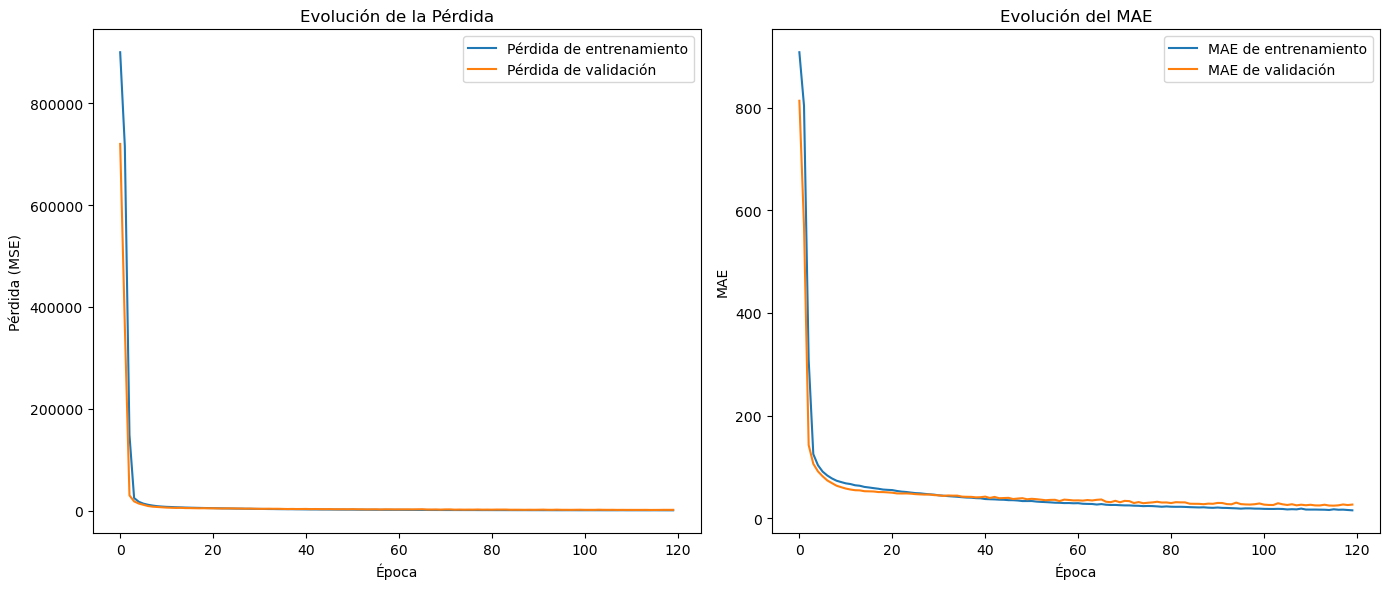

In [ ]:
# Visualizar la pérdida de entrenamiento y validación
plt.figure(figsize=(14, 6))

# Pérdida (MSE)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.legend()

# Error Absoluto Medio (MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='MAE de entrenamiento')
plt.plot(history.history['val_mean_absolute_error'], label='MAE de validación')
plt.title('Evolución del MAE')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

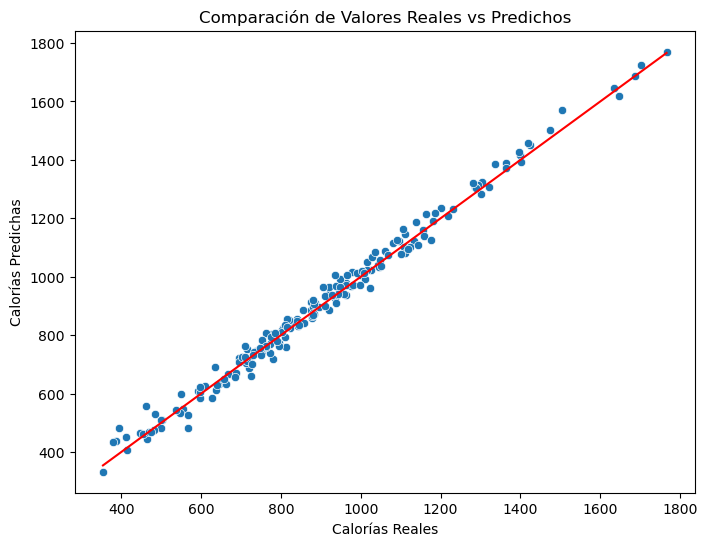

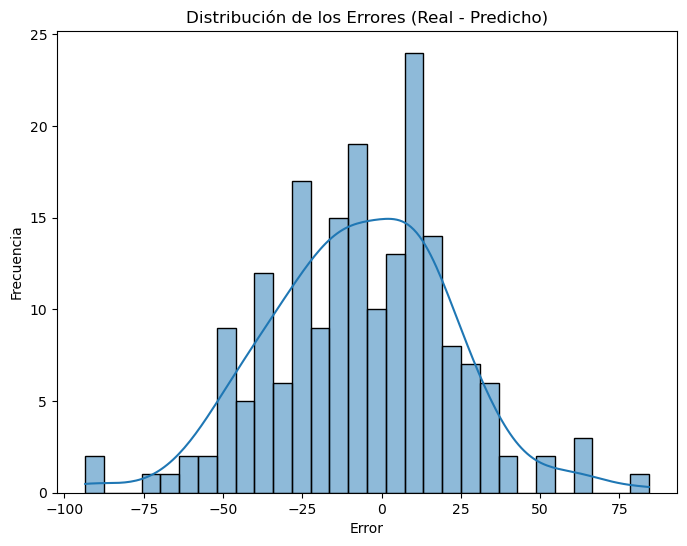

In [ ]:
# Gráfico de dispersión Real vs Predicho
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Real', y='Predicho', data=comparison)
plt.title('Comparación de Valores Reales vs Predichos')
plt.xlabel('Calorías Reales')
plt.ylabel('Calorías Predichas')
plt.plot([comparison['Real'].min(), comparison['Real'].max()], 
         [comparison['Real'].min(), comparison['Real'].max()], 
         color='red')  # Línea de referencia
plt.show()

# Histograma de errores
plt.figure(figsize=(8, 6))
sns.histplot(comparison['Real'] - comparison['Predicho'], bins=30, kde=True)
plt.title('Distribución de los Errores (Real - Predicho)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Calcular R²
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de Determinación (R²) en el conjunto de prueba: {r2:.4f}')

Coeficiente de Determinación (R²) en el conjunto de prueba: 0.9893


In [ ]:
comparison.head(30)

,Real,Predicho
0,354.0,332.356232
1,636.0,612.901978
2,678.0,666.753418
3,1688.0,1686.181885
4,962.0,979.930847
5,695.0,720.211548
6,813.0,760.434692
7,804.0,825.229858
8,598.0,616.995789
9,1163.0,1213.615723


In [ ]:
# Guardar el modelo en formato HDF5
model.save('calories_burned_predictor.h5')
print("Modelo guardado exitosamente.")

Modelo guardado exitosamente.
